# Uvoz podatkov

Podatki iz 5. 11. 2019

In [1]:
import numpy as np
import pandas as pd

players = pd.read_csv('csv/overallFIXED.csv', index_col='Id', encoding='utf8')
general = pd.read_csv('csv/general.csv', index_col='Id')
solo = pd.read_csv('csv/solo.csv', index_col='Id')
duo = pd.read_csv('csv/duo.csv', index_col='Id')
triple = pd.read_csv('csv/triple.csv', index_col='Id')
quad = pd.read_csv('csv/quad.csv', index_col='Id')

pd.options.display.max_rows = 50

In [2]:
%matplotlib inline

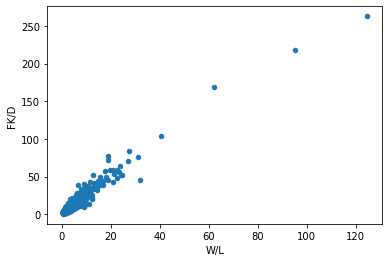

In [3]:
players.plot.scatter('W/L', 'FK/D')

In [4]:
temp = players['W/L']
temp1 = (solo.rename(columns={'FK/D': 'Solo'}))['Solo']
temp2 = (duo.rename(columns={'FK/D': 'Duo'}))['Duo']
temp3 = (triple.rename(columns={'FK/D': 'Triple'}))['Triple']
temp4 = (quad.rename(columns={'FK/D': 'Quad'}))['Quad']
conc = pd.concat([temp, temp1, temp2, temp3, temp4], axis=1)
conc[conc['W/L'] < 12].count()

W/L       954
Solo      954
Duo       954
Triple    954
Quad      954
dtype: int64

True

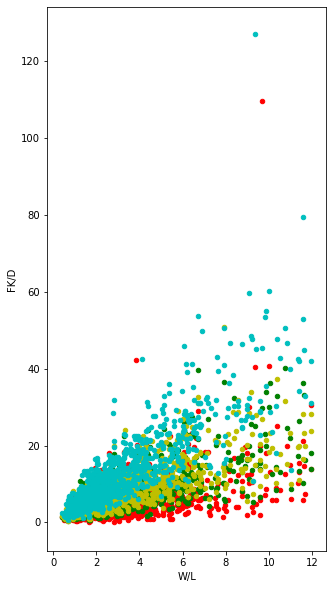

In [5]:
conc1 = conc[(conc['W/L'] < 12)]
ax1 = conc1.plot(kind='scatter', x='W/L', y='Solo', color='r')    
ax2 = conc1.plot(kind='scatter', x='W/L', y='Duo', color='g', ax=ax1)    
ax3 = conc1.plot(kind='scatter', x='W/L', y='Triple', color='y', ax=ax1)
ax4 = conc1.plot(kind='scatter', x='W/L', y='Quad', color='c', ax=ax1, figsize=(5,10))
ax4.set_ylabel("FK/D")
ax1 == ax2 == ax3 == ax4

True

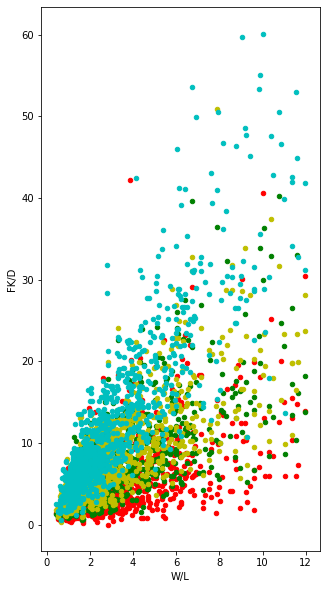

In [6]:
conc1 = conc[(conc['W/L'] < 12) & (conc['Solo'] < 65) & (conc['Duo'] < 65) & (conc['Triple'] < 65) & (conc['Quad'] < 65)]
ax1 = conc1.plot(kind='scatter', x='W/L', y='Solo', color='r')    
ax2 = conc1.plot(kind='scatter', x='W/L', y='Duo', color='g', ax=ax1)    
ax3 = conc1.plot(kind='scatter', x='W/L', y='Triple', color='y', ax=ax1)
ax4 = conc1.plot(kind='scatter', x='W/L', y='Quad', color='c', ax=ax1, figsize=(5,10))
ax4.set_ylabel("FK/D")
ax1 == ax2 == ax3 == ax4

In [7]:
import statsmodels.formula.api as sm
playertemp = players.rename(columns={'FK/D': 'A', 'W/L': 'B'})
playertemp = playertemp[playertemp['B']<12]
conc2 = conc1.rename(columns={'W/L': 'A'})

In [8]:
tempdict = sm.ols(formula="A ~ B", data=playertemp).fit()
(tempdict.params, tempdict.bse)

(Intercept    0.890964
 B            2.602685
 dtype: float64,
 Intercept    0.156057
 B            0.039640
 dtype: float64)

In [9]:
tempdict = sm.ols(formula="Solo ~ A", data=conc2).fit()
(tempdict.params, tempdict.bse)

(Intercept    1.477469
 A            1.087753
 dtype: float64,
 Intercept    0.204170
 A            0.052341
 dtype: float64)

In [10]:
tempdict = sm.ols(formula="Duo ~ A", data=conc2).fit()
(tempdict.params, tempdict.bse)

(Intercept    1.715251
 A            1.691894
 dtype: float64,
 Intercept    0.213232
 A            0.054664
 dtype: float64)

In [11]:
tempdict = sm.ols(formula="Triple ~ A", data=conc2).fit()
(tempdict.params, tempdict.bse)

(Intercept    2.268322
 A            1.851885
 dtype: float64,
 Intercept    0.210399
 A            0.053938
 dtype: float64)

In [12]:
tempdict = sm.ols(formula="Quad ~ A", data=conc2).fit()
(tempdict.params, tempdict.bse)

(Intercept    0.958758
 A            3.630700
 dtype: float64,
 Intercept    0.282263
 A            0.072361
 dtype: float64)

In [13]:
guilds = players.groupby('Guild')
guilds.size().reset_index(name='count').sort_values('count', ascending=False).style.hide_index()

Guild,count
None,212
[FAZE],48
[IYN],42
[ANNOY],32
[GGMEN],30
[TRAGEDY],28
[ENIGMA],25
[STORM],23
[DARK],22
[ABYSS],20


In [14]:
rank = players.groupby('Rank')
rank.size().reset_index(name='count').sort_values('count', ascending=False).style.hide_index()

Rank,count
[MVP+],658
[MVP++],226
[VIP],36
None,34
[VIP+],20
[MVP],9
[YOUTUBE],9
[MOD],2
[HELPER],1
[PIG+++],1


In [15]:
players.insert(3, "Solo games", (solo.W + solo.L) // 100)
players.insert(4, "Duo games", (duo.W + duo.L) // 100)
players.insert(5, "Triple games", (triple.W + triple.L) // 100)
players.insert(6, "Quad games", (quad.W + quad.L) // 100)

True

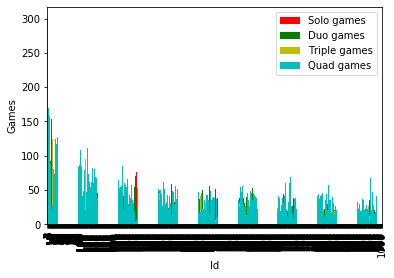

In [16]:
ax1 = players.reset_index().plot(kind='bar', x='Id', y='Solo games', color='r')    
ax2 = players.reset_index().plot(kind='bar', x='Id', y='Duo games', color='g', ax=ax1)    
ax3 = players.reset_index().plot(kind='bar', x='Id', y='Triple games', color='y', ax=ax1)
ax4 = players.reset_index().plot(kind='bar', x='Id', y='Quad games', color='c', ax=ax1)
ax4.set_ylabel("Games")
ax1 == ax2 == ax3 == ax4

In [17]:
(players["Solo games"].mean(),players["Duo games"].mean(),players["Triple games"].mean(),players["Quad games"].mean())

(8.160642570281125, 19.029116465863453, 16.309236947791163, 42.54317269076305)

In [18]:
players[["Solo games", "Duo games", "Triple games", "Quad games"]].max();

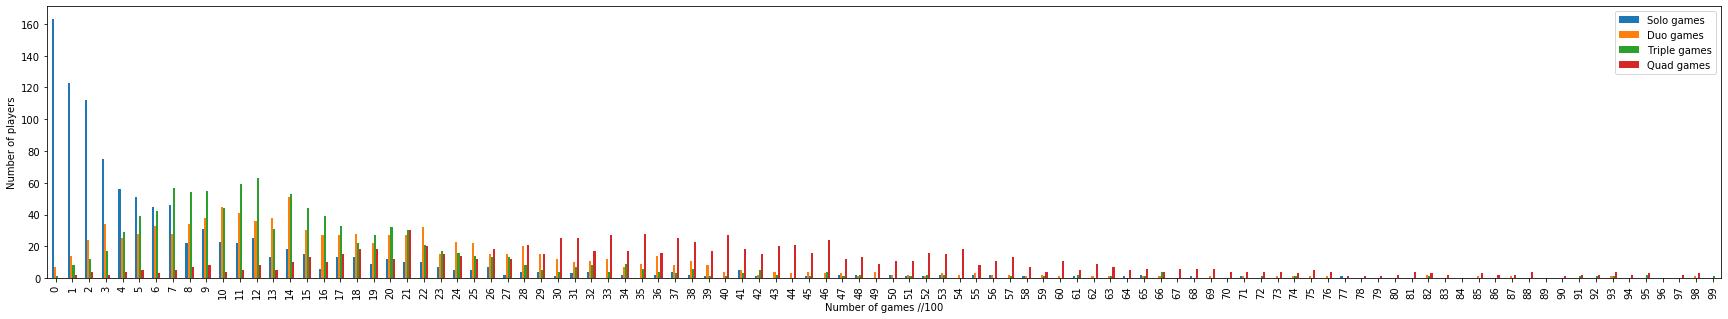

In [19]:
counted_games_temp = pd.DataFrame(data = None, index = [i for i in range(0,303)])
counted_games = pd.concat([counted_games_temp, players["Solo games"].value_counts(), 
players["Duo games"].value_counts(),
players["Triple games"].value_counts(),
players["Quad games"].value_counts()], axis=1)
plot = counted_games.head(100).reset_index().plot.bar(x = 'index', figsize=(30,5))
plot.set_ylabel("Number of players")
plot.set_xlabel("Number of games //100")
plot

True

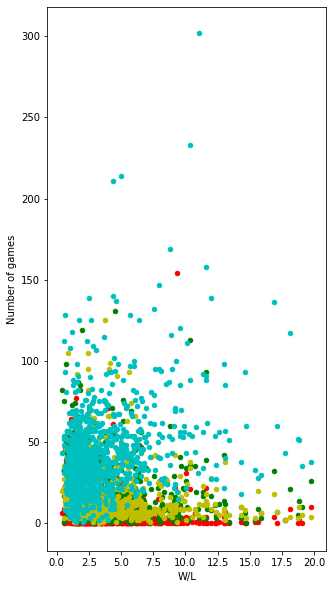

In [20]:
conc1 = players[(players['W/L'] < 20)]
ax1 = conc1.plot(kind='scatter', x='W/L', y='Solo games', color='r')    
ax2 = conc1.plot(kind='scatter', x='W/L', y='Duo games', color='g', ax=ax1)    
ax3 = conc1.plot(kind='scatter', x='W/L', y='Triple games', color='y', ax=ax1)
ax4 = conc1.plot(kind='scatter', x='W/L', y='Quad games', color='c', ax=ax1, figsize=(5,10))
ax4.set_ylabel("Number of games")
ax1 == ax2 == ax3 == ax4

In [21]:
conc1.insert(0, 'Total games', (conc1['Solo games']+conc1['Duo games']+conc1['Triple games']+conc1['Quad games']))

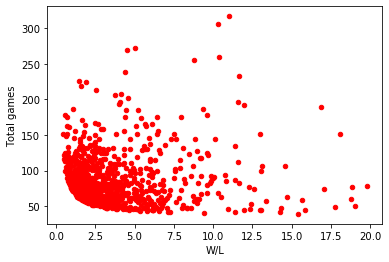

In [22]:
conc1.plot(kind='scatter', x='W/L', y='Total games', color='r')

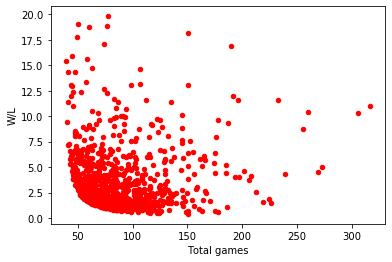

In [23]:
conc1.plot(kind='scatter', x='Total games', y='W/L', color='r')